# Proyecto 2 Steam

**Objetivo del proyecto:** El propósito de este proyecto es poder elaborar un sistema de recomendación basado en datos reales provistos por la plataforma Steam.

El sistema de recomendación sugiere títulos a un usuario en base a lo que ha comprado, jugado y lo que otros usuarios similares a él han comprado y jugado.

**Resultados del proyecto**

1. Un analisis de la información que se tiene y como podrían sacarle provecho para elaborar
un sistema de recomendación.
2. Definir una métrica o proceso que les permita evaluar su sistema de recomendación
3. Generar un sistema de recomendación, que dado la información de un usuario (ID +
Historial de compra y juegos) le recomiende otros juegos.
4. Elaborar hipótesis de que información que no se tiene podría mejorar su sistema de recomendación.

Autores:
- Omar David Hernández Aguirre  | A01383543
- Emiliano Daniel Flores Garza  | A00825175

Tec de Monterrey  
11 de mayo de 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio

Análisis exploratorio de los datasets:

- [steam_description_data.csv](#steam_description_datacsv)
- [steam_media_data.csv](#steam_media_datacsv)
- [steam_requirements_data.csv](#steam_requirements_datacsv)
- [steam_support_info.csv](#steam_support_infocsv)
- [steam_user_behavior.csv](#steam_user_behaviorcsv)
- [steam.csv](#steamcsv)
- [steamspy_tag_data.csv](#steamspy_tag_datacsv)

##### `steam_description_data.csv`

In [116]:
steam_description_df = pd.read_csv("Steam/steam_description_data.csv")

In [105]:
steam_description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27334 entries, 0 to 27333
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   steam_appid           27334 non-null  int64 
 1   detailed_description  27334 non-null  object
 2   about_the_game        27334 non-null  object
 3   short_description     27334 non-null  object
dtypes: int64(1), object(3)
memory usage: 854.3+ KB


In [106]:
steam_description_df.head()

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


In [107]:
steam_description_df.describe()

,steam_appid
count,2.733400e+04
mean,5.982886e+05
std,2.512113e+05
min,1.000000e+01
25%,4.030925e+05
50%,6.019650e+05
75%,8.011750e+05
max,1.069460e+06


In [108]:
steam_description_df.describe(include='all')

,steam_appid,detailed_description,about_the_game,short_description
count,2.733400e+04,27334,27334,27334
unique,NaN,27315,27315,27204
top,NaN,"The 58th year of Shouwa, early summer.<br>It’s...","The 58th year of Shouwa, early summer.<br>It’s...",Minimal physical puzzle with explosions
freq,NaN,3,3,12
mean,5.982886e+05,NaN,NaN,NaN
std,2.512113e+05,NaN,NaN,NaN
min,1.000000e+01,NaN,NaN,NaN
25%,4.030925e+05,NaN,NaN,NaN
50%,6.019650e+05,NaN,NaN,NaN
75%,8.011750e+05,NaN,NaN,NaN


In [117]:
print(f"Duplicados: {steam_description_df.duplicated().sum()}")

Duplicados: 0


##### `steam_media_data.csv`

In [118]:
steam_media_df = pd.read_csv("Steam/steam_media_data.csv")

In [119]:
steam_media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27332 entries, 0 to 27331
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steam_appid   27332 non-null  int64 
 1   header_image  27332 non-null  object
 2   screenshots   27332 non-null  object
 3   background    27332 non-null  object
 4   movies        25641 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [120]:
steam_media_df.head()

,steam_appid,header_image,screenshots,background,movies
0,10,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,NaN
1,20,https://steamcdn-a.akamaihd.net/steam/apps/20/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/20/...,NaN
2,30,https://steamcdn-a.akamaihd.net/steam/apps/30/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/30/...,NaN
3,40,https://steamcdn-a.akamaihd.net/steam/apps/40/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,NaN
4,50,https://steamcdn-a.akamaihd.net/steam/apps/50/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,NaN


In [121]:
steam_media_df.describe()

,steam_appid
count,2.733200e+04
mean,5.982850e+05
std,2.512123e+05
min,1.000000e+01
25%,4.030850e+05
50%,6.019650e+05
75%,8.011650e+05
max,1.069460e+06


In [122]:
steam_media_df.describe(include='all')

,steam_appid,header_image,screenshots,background,movies
count,2.733200e+04,27332,27332,27332,25641
unique,NaN,27332,27332,27332,25639
top,NaN,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 5968, 'name': 'X Superbox Trailer', 't..."
freq,NaN,1,1,1,3
mean,5.982850e+05,NaN,NaN,NaN,NaN
std,2.512123e+05,NaN,NaN,NaN,NaN
min,1.000000e+01,NaN,NaN,NaN,NaN
25%,4.030850e+05,NaN,NaN,NaN,NaN
50%,6.019650e+05,NaN,NaN,NaN,NaN
75%,8.011650e+05,NaN,NaN,NaN,NaN


In [123]:
print(f"Duplicados: {steam_media_df.duplicated().sum()}")

Duplicados: 0


##### `steam_requirements_data.csv`

In [12]:
steam_requirements_df = pd.read_csv("Steam/steam_requirements_data.csv")

In [13]:
steam_requirements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27319 entries, 0 to 27318
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   steam_appid         27319 non-null  int64 
 1   pc_requirements     27319 non-null  object
 2   mac_requirements    27319 non-null  object
 3   linux_requirements  27319 non-null  object
 4   minimum             27314 non-null  object
 5   recommended         14134 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


In [14]:
steam_requirements_df.head()

,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
3,40,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
4,50,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN


In [16]:
steam_requirements_df.describe()

,steam_appid
count,2.731900e+04
mean,5.984052e+05
std,2.511286e+05
min,1.000000e+01
25%,4.031950e+05
50%,6.020400e+05
75%,8.012050e+05
max,1.069460e+06


In [17]:
steam_requirements_df.describe(include="all")

,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
count,2.731900e+04,27319,27319,27319,27314,14134
unique,NaN,25411,8086,5300,25132,12318
top,NaN,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],OS: Windows 7,Requires a 64-bit processor and operating system
freq,NaN,134,16101,18972,138,817
mean,5.984052e+05,NaN,NaN,NaN,NaN,NaN
std,2.511286e+05,NaN,NaN,NaN,NaN,NaN
min,1.000000e+01,NaN,NaN,NaN,NaN,NaN
25%,4.031950e+05,NaN,NaN,NaN,NaN,NaN
50%,6.020400e+05,NaN,NaN,NaN,NaN,NaN
75%,8.012050e+05,NaN,NaN,NaN,NaN,NaN


##### `steam_support_info.csv`

In [18]:
steam_support_df = pd.read_csv("Steam/steam_support_info.csv")

In [19]:
steam_support_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27136 entries, 0 to 27135
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   steam_appid    27136 non-null  int64 
 1   website        18015 non-null  object
 2   support_url    16479 non-null  object
 3   support_email  23500 non-null  object
dtypes: int64(1), object(3)
memory usage: 848.1+ KB


In [20]:
steam_support_df.head()

,steam_appid,website,support_url,support_email
0,10,NaN,http://steamcommunity.com/app/10,NaN
1,30,http://www.dayofdefeat.com/,NaN,NaN
2,50,NaN,https://help.steampowered.com,NaN
3,70,http://www.half-life.com/,http://steamcommunity.com/app/70,NaN
4,80,NaN,http://steamcommunity.com/app/80,NaN


In [21]:
steam_support_df.describe()

,steam_appid
count,2.713600e+04
mean,6.014279e+05
std,2.483102e+05
min,1.000000e+01
25%,4.062875e+05
50%,6.038550e+05
75%,8.021000e+05
max,1.069460e+06


In [22]:
steam_support_df.describe(include="all")

,steam_appid,website,support_url,support_email
count,2.713600e+04,18015,16479,23500
unique,NaN,15320,11100,14174
top,NaN,https://www.choiceofgames.com/,https://bigfishgames.custhelp.com/app/home,info@bigfishgames.com
freq,NaN,130,172,202
mean,6.014279e+05,NaN,NaN,NaN
std,2.483102e+05,NaN,NaN,NaN
min,1.000000e+01,NaN,NaN,NaN
25%,4.062875e+05,NaN,NaN,NaN
50%,6.038550e+05,NaN,NaN,NaN
75%,8.021000e+05,NaN,NaN,NaN


##### `steam_user_behavior.csv`

In [23]:
steam_user_behavior_dt = pd.read_csv("Steam/steam_user_behavior.csv")

In [24]:
steam_user_behavior_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   UserID  200000 non-null  int64  
 1   Name    200000 non-null  object 
 2   Action  200000 non-null  object 
 3   Value   200000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [25]:
steam_user_behavior_dt.head()

,UserID,Name,Action,Value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [26]:
steam_user_behavior_dt.describe()

,UserID,Value
count,2.000000e+05,200000.000000
mean,1.036559e+08,17.874384
std,7.208074e+07,138.056952
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


In [27]:
steam_user_behavior_dt.describe(include="all")

,UserID,Name,Action,Value
count,2.000000e+05,200000,200000,200000.000000
unique,NaN,5155,2,NaN
top,NaN,Dota 2,purchase,NaN
freq,NaN,9682,129511,NaN
mean,1.036559e+08,NaN,NaN,17.874384
std,7.208074e+07,NaN,NaN,138.056952
min,5.250000e+03,NaN,NaN,0.100000
25%,4.738420e+07,NaN,NaN,1.000000
50%,8.691201e+07,NaN,NaN,1.000000
75%,1.542309e+08,NaN,NaN,1.300000


##### `steam.csv`

In [28]:
steam_df = pd.read_csv("Steam/steam.csv")

In [29]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [48]:
steam_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [31]:
steam_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [32]:
steam_df.describe(include="all")

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
count,2.707500e+04,27075,27075,27075.000000,27075,27075,27075,27075.000000,27075,27075,27075,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075,27075.000000
unique,NaN,27033,2619,NaN,17113,14354,7,NaN,3333,1552,6423,NaN,NaN,NaN,NaN,NaN,13,NaN
top,NaN,Dark Matter,2018-07-13,NaN,Choice of Games,Big Fish Games,windows,NaN,Single-player,Action;Indie,Action;Indie;Casual,NaN,NaN,NaN,NaN,NaN,0-20000,NaN
freq,NaN,3,64,NaN,94,212,18398,NaN,6110,1852,845,NaN,NaN,NaN,NaN,NaN,18596,NaN
mean,5.962035e+05,NaN,NaN,0.981127,NaN,NaN,NaN,0.354903,NaN,NaN,NaN,45.248864,1.000559e+03,211.027147,149.804949,146.05603,NaN,6.078193
std,2.508942e+05,NaN,NaN,0.136081,NaN,NaN,NaN,2.406044,NaN,NaN,NaN,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,NaN,7.874922
min,1.000000e+01,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.00000,NaN,0.000000
25%,4.012300e+05,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,6.000000e+00,2.000000,0.000000,0.00000,NaN,1.690000
50%,5.990700e+05,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,7.000000,2.400000e+01,9.000000,0.000000,0.00000,NaN,3.990000
75%,7.987600e+05,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,23.000000,1.260000e+02,42.000000,0.000000,0.00000,NaN,7.190000


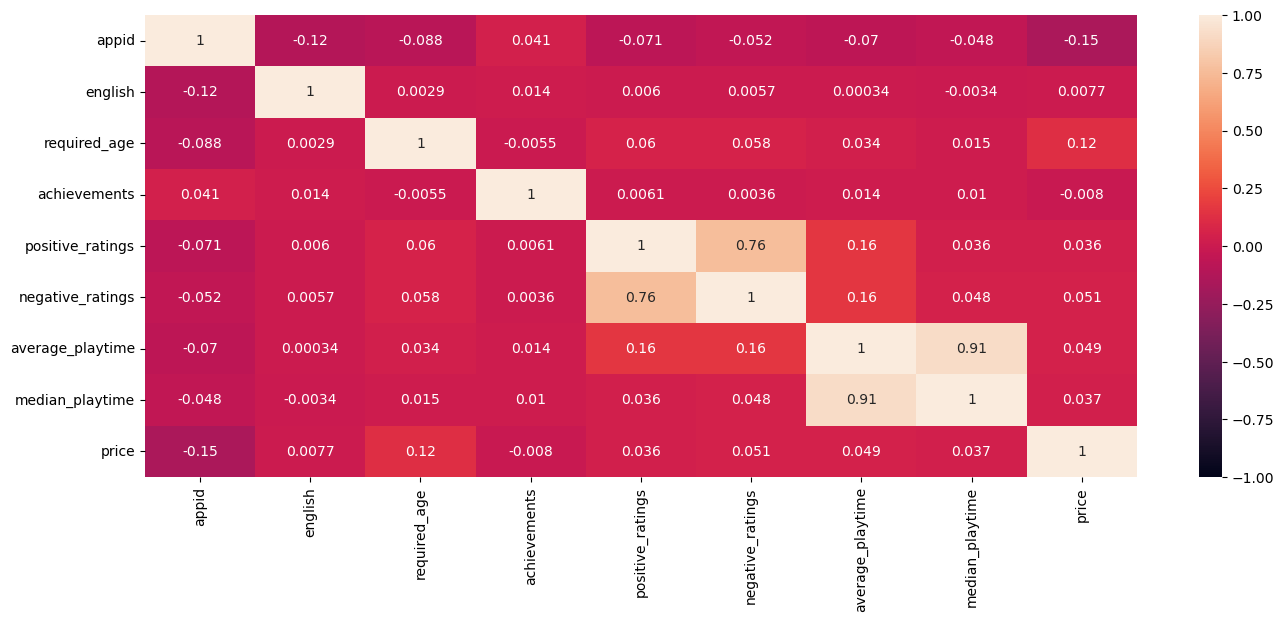

In [46]:
plt.figure(figsize=(16, 6))
sns.heatmap(steam_df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
plt.show()
plt.close()

##### `steamspy_tag_data.csv`

In [33]:
steamspy_tag_df = pd.read_csv("Steam/steamspy_tag_data.csv")

In [34]:
steamspy_tag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29022 entries, 0 to 29021
Columns: 372 entries, appid to e_sports
dtypes: int64(372)
memory usage: 82.4 MB


In [35]:
steamspy_tag_df.head()

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
steamspy_tag_df.describe()

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
count,2.902200e+04,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,...,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000
mean,5.952577e+05,0.183826,0.167011,0.137689,3.646992,0.248053,0.005789,0.060092,0.233547,0.093791,...,0.134140,0.049962,0.017573,0.158742,0.023637,0.092034,0.761698,0.016470,3.314382,0.574426
std,2.521478e+05,7.916178,5.114638,3.228531,47.377053,7.160597,0.455944,1.139116,4.750858,3.142058,...,5.722873,1.335872,0.934081,7.371732,1.002216,5.736370,24.977839,0.892563,104.515689,56.920088
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.997825e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.994700e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.987275e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.069460e+06,954.000000,564.000000,253.000000,5626.000000,641.000000,68.000000,70.000000,365.000000,221.000000,...,552.000000,109.000000,106.000000,806.000000,117.000000,746.000000,2697.000000,78.000000,12338.000000,8406.000000


In [37]:
steamspy_tag_df.describe(include="all")

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
count,2.902200e+04,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,...,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000
mean,5.952577e+05,0.183826,0.167011,0.137689,3.646992,0.248053,0.005789,0.060092,0.233547,0.093791,...,0.134140,0.049962,0.017573,0.158742,0.023637,0.092034,0.761698,0.016470,3.314382,0.574426
std,2.521478e+05,7.916178,5.114638,3.228531,47.377053,7.160597,0.455944,1.139116,4.750858,3.142058,...,5.722873,1.335872,0.934081,7.371732,1.002216,5.736370,24.977839,0.892563,104.515689,56.920088
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.997825e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.994700e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.987275e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.069460e+06,954.000000,564.000000,253.000000,5626.000000,641.000000,68.000000,70.000000,365.000000,221.000000,...,552.000000,109.000000,106.000000,806.000000,117.000000,746.000000,2697.000000,78.000000,12338.000000,8406.000000


### Juntando datasets

Algunos datasets comparten la misma columna `steam_appid` y `appid`, por lo que podríamos juntar estos datasets en un solo dataframe.

Primero, juntaremos los datasets `steam_description_data`, `steam_media_data`, `steam_requirements_data`, y `steam_support_info` mediante la columna `steam_appid`

In [128]:
df1 = steam_description_df.merge(steam_media_df, on="steam_appid").merge(steam_requirements_df, on="steam_appid").merge(steam_support_df, on="steam_appid")
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27123 entries, 0 to 27122
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   steam_appid           27123 non-null  int64 
 1   detailed_description  27123 non-null  object
 2   about_the_game        27123 non-null  object
 3   short_description     27123 non-null  object
 4   header_image          27123 non-null  object
 5   screenshots           27123 non-null  object
 6   background            27123 non-null  object
 7   movies                25592 non-null  object
 8   pc_requirements       27123 non-null  object
 9   mac_requirements      27123 non-null  object
 10  linux_requirements    27123 non-null  object
 11  minimum               27118 non-null  object
 12  recommended           14101 non-null  object
 13  website               18004 non-null  object
 14  support_url           16473 non-null  object
 15  support_email         23492 non-null

Después, juntaremos los datasets `steam` y `steamspy_tag_data` mediante la columna `appid`

In [131]:
df2 = steam_df.merge(steamspy_tag_df, on="appid")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 0 to 27074
Columns: 389 entries, appid to e_sports
dtypes: float64(1), int64(379), object(9)
memory usage: 80.6+ MB
